In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Import Libraries

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [6]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [7]:
cnn = tf.keras.models.Sequential()

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [12]:
cnn = models.Sequential()

# Add Input layer
cnn.add(layers.Input(shape=(128, 128, 3)))

# Add Convolutional layers
cnn.add(layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
cnn.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu'))

# Add Max Pooling layer
cnn.add(layers.MaxPool2D(pool_size=2, strides=2))

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [14]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [15]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [16]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [17]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [18]:
cnn.add(tf.keras.layers.Flatten())

In [19]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [20]:
cnn.add(tf.keras.layers.Dropout(0.4))

In [21]:
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [23]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])


In [24]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2721s 1s/step - accuracy: 0.4085 - loss: 2.0805 - val_accuracy: 0.8288 - val_loss: 0.5569
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2939s 1s/step - accuracy: 0.8419 - loss: 0.5015 - val_accuracy: 0.9058 - val_loss: 0.2922
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3391s 2s/step - accuracy: 0.9051 - loss: 0.2916 - val_accuracy: 0.9203 - val_loss: 0.2507
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2986s 1s/step - accuracy: 0.9341 - loss: 0.2008 - val_accuracy: 0.9402 - val_loss: 0.1914
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2860s 1s/step - accuracy: 0.9530 - loss: 0.1455 - val_accuracy: 0.9520 - val_loss: 0.1529
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2748s 1s/step - accuracy: 0.9636 - loss: 0.1114 - val_accuracy: 0.9538 - val_loss: 0.1476
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2896s 1s/step - accuracy: 0.9716 - loss: 0.0868 - val_accuracy: 0.9598 - val_loss: 0.1295
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3129s 1s/step - accuracy: 0.9776 -

In [26]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 775s 353ms/step - accuracy: 0.9897 - loss: 0.0289
Training accuracy: 0.9912369251251221


In [27]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 208s 378ms/step - accuracy: 0.9662 - loss: 0.1074
Validation accuracy: 0.9660823941230774


In [28]:
cnn.save('trained_plant_disease_model.keras')

In [29]:
training_history.history #Return Dictionary of history


{'accuracy': [0.6112667918205261,
  0.8634327054023743,
  0.9144035577774048,
  0.9396401047706604,
  0.9565972089767456,
  0.9646062850952148,
  0.9715769290924072,
  0.9772245287895203,
  0.9784906506538391,
  0.9808663725852966],
 'loss': [1.3095617294311523,
  0.4339182674884796,
  0.2631179988384247,
  0.18323259055614471,
  0.13560117781162262,
  0.10888692736625671,
  0.08702850341796875,
  0.071182020008564,
  0.06461546570062637,
  0.05925275385379791],
 'val_accuracy': [0.828761637210846,
  0.9057591557502747,
  0.9202708601951599,
  0.9401889443397522,
  0.9519690275192261,
  0.9538470506668091,
  0.959822416305542,
  0.9602777361869812,
  0.9632369875907898,
  0.9660823941230774],
 'val_loss': [0.5569005012512207,
  0.29222428798675537,
  0.2507443428039551,
  0.19143454730510712,
  0.15292330086231232,
  0.1475878357887268,
  0.12952308356761932,
  0.121659055352211,
  0.11799465864896774,
  0.11273618787527084]}

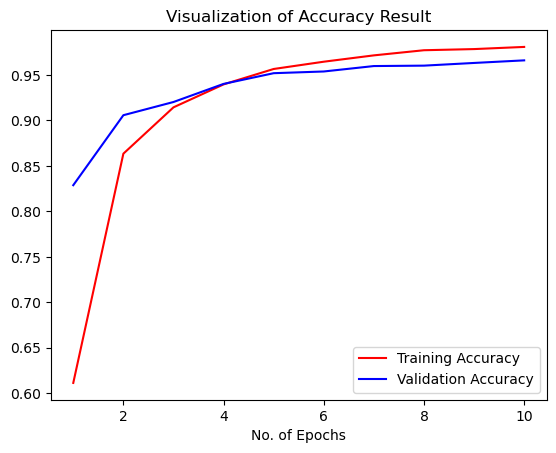

In [30]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [31]:
class_name = validation_set.class_names


In [32]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [33]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 287s 16ms/step


In [34]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

2024-10-10 23:34:37.209953: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [36]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [37]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [38]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.93      0.96       504
                                 Apple___Black_rot       0.99      0.99      0.99       497
                          Apple___Cedar_apple_rust       0.99      0.97      0.98       440
                                   Apple___healthy       0.95      0.97      0.96       502
                               Blueberry___healthy       0.95      0.99      0.97       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.95      0.97       421
                 Cherry_(including_sour)___healthy       1.00      0.93      0.96       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.90      0.92       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.91      0.98      0.

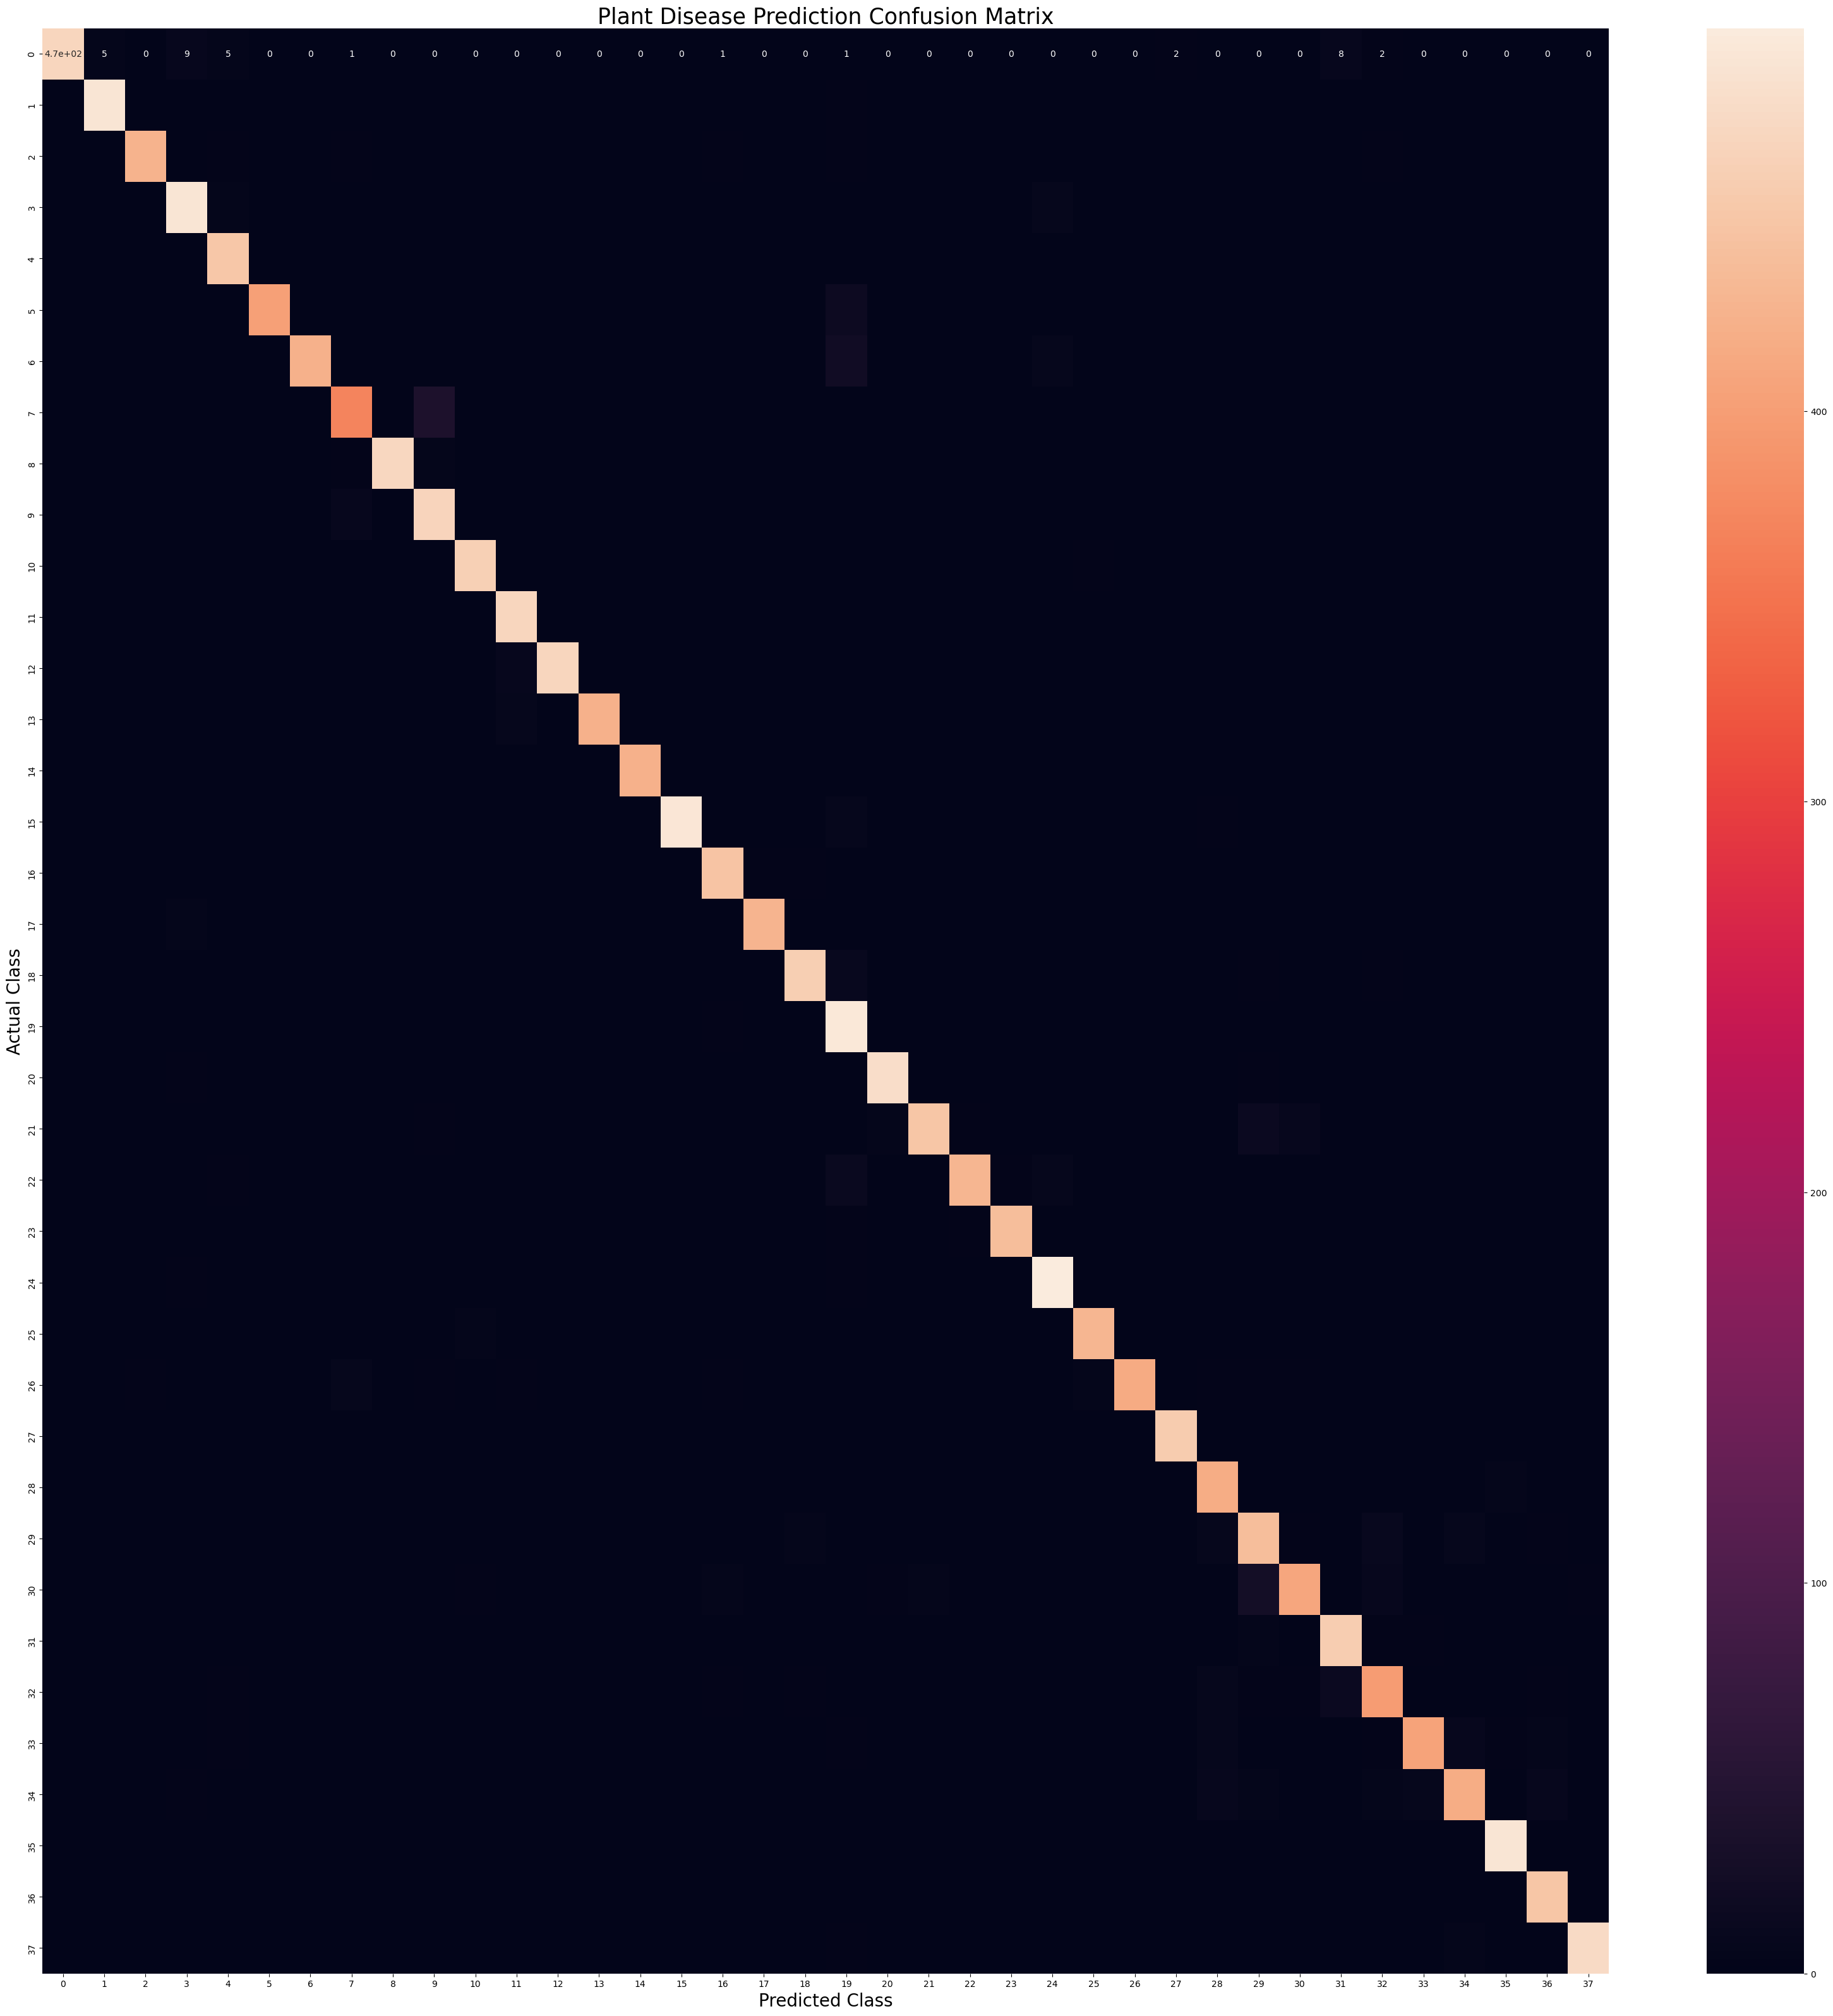

In [39]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()